### Pyber Ridesharing Company Background 

Pyber is new ride sharing company imerging into the ride sharing market and competing against giant ride sharing comanies like  Uber and lyft. Being a newly appointed Data Strategist of this comapny I need to offer data backed guidance on a new opportunities for market differentiation. 

After creating Bubble chart and few pie charts based on avaialable data here are my Obervable trends: 

Pyber is growing simeltenuously in urban, suburban and rural areas. However, the demand vs supply in each regions is very different. 

1. By looking at Pyber Ride Sharing bubble chart, I can say that there is a negative correlation between No of Rides and Average fare. The more the average fare less the no of rides. The demand for ride sharing is more in Urban cities, so does drivers count which leads to more compettion and reduced Average fare. There are few exceptions to this where there is high demand and less no of drivers avaialability and vise versa.
 
2. Looking at "Total fares by city" and "Total rides by city" pie chart I can say that, the profit margin is more in Suburban and Rural area as compared to ride sharing market vs profit margin and ride sharing market from Urban cities. That means there is an opportunity to grow more in Suburban and rural areas. 

3. Looking at "Total drivers by City" pie chart, I can see that, drivers avaialability is 77% more than the rural cities, which tells there is an opportunity to get more business from Urban cities as well. 
 
The company should do the follwing two things to benefit more from exisitng drivers: 

 * Lower the average fare in rural cities which might increase the demand of ride sharing. 
 * Increasing the average fare by 10 % (after obeserving competitors average fare price for that region), where demand is already high, will increse company profits.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride_df=pd.merge(ride_data_df,city_data_df,how='left',on='city')

# Display the data table for preview
combined_city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
#get Data by each City and type of City
city_type=combined_city_ride_df.groupby(['type','city'])

#Calculate Avarage Fare for each type

Ave_fare = round(city_type['fare'].mean(),2)
TotalRides = city_type['ride_id'].count()
TotalDrivers = city_type['driver_count'].mean()

Totalfare_byCityType=city_type['fare'].sum()


city_ride_df = pd.DataFrame({"Total Fare":Totalfare_byCityType,
                             "Average Fare":Ave_fare,
                             "Total Rides":TotalRides,
                             "Total Drivers":TotalDrivers})


city_ride_df=city_ride_df.reset_index()
city_ride_df.head()


,type,city,Total Fare,Average Fare,Total Rides,Total Drivers
0,Rural,Bradshawfurt,400.64,40.06,10,7
1,Rural,Garzaport,72.37,24.12,3,7
2,Rural,Harringtonfort,200.82,33.47,6,4
3,Rural,Jessicaport,216.08,36.01,6,1
4,Rural,Lake Jamie,206.15,34.36,6,4


In [3]:
#CreateDataframes for each City Type

urban_df=city_ride_df.loc[city_ride_df['type']=='Urban']
suburban_df=city_ride_df.loc[city_ride_df['type']=='Suburban']
rural_df=city_ride_df.loc[city_ride_df['type']=='Rural']

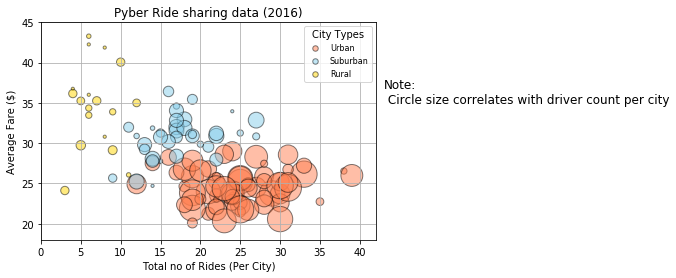

In [4]:
# Build the scatter plots for each city types

plt.scatter(urban_df["Total Rides"],urban_df["Average Fare"], s=urban_df['Total Drivers']*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")
plt.scatter(suburban_df["Total Rides"],suburban_df["Average Fare"], s=suburban_df['Total Drivers']*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")
plt.scatter(rural_df["Total Rides"],rural_df["Average Fare"], s=rural_df['Total Drivers']*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
 
# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#Add Title, and x,y labels to Chart. 
plt.title("Pyber Ride sharing data (2016)")
plt.xlabel("Total no of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Add Grid, and Upperlimit, lower limit for X, y coordinate margines.
plt.grid()
plt.xlim(0,42)
plt.ylim(18,45)

# Incorporate a text label regarding circle size
plt.text(43, 35, 'Note:\n Circle size correlates with driver count per city', fontsize=12)

plt.show()


## Total Fares by City Type

In [5]:
# Calculate Type Percents

grpByType=city_ride_df.groupby("type")
TotalFarebytype=grpByType["Total Fare"].sum()

TotalFare_allType=round(TotalFarebytype.sum(axis=0),2)

Type_percents=round(TotalFarebytype/TotalFare_allType*100,1)

TotalFares_df=pd.DataFrame({"Total Fare":TotalFarebytype,
                            "Fare percent":Type_percents })

TotalFares_df=TotalFares_df.reset_index()

TotalFares_df

,type,Total Fare,Fare percent
0,Rural,4327.93,6.8
1,Suburban,19356.33,30.5
2,Urban,39854.38,62.7


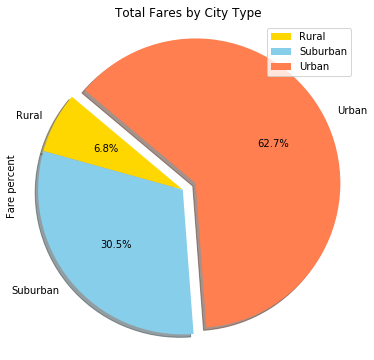

<Figure size 432x288 with 0 Axes>

In [12]:
# Build Pie Chart

labels=["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","skyblue","coral"]

TotalFares_df.plot(kind='Pie',y='Fare percent', figsize=(6, 6),explode=explode,labels=labels,
                          autopct="%1.1f%%",colors=colors,shadow=True,startangle=140,title="Total Fares by City Type")
plt.axis("equal")

# Show Figure
plt.show()

# Save Figure
plt.savefig("../Images/TotalFareByCityType.png")

## Total Rides by City Type

In [7]:
# Calculate Ride Percents

Totalridesbytype=grpByType["Total Rides"].sum()

TotalPyberRides=round(Totalridesbytype.sum(axis=0),2)

Type_percents=round(Totalridesbytype/TotalPyberRides*100,1)

TotalRides_df=pd.DataFrame({"Total Rides":TotalFarebytype,
                            "Ride percent":Type_percents })

TotalRides_df=TotalRides_df.reset_index()

TotalRides_df


,type,Total Rides,Ride percent
0,Rural,4327.93,5.3
1,Suburban,19356.33,26.3
2,Urban,39854.38,68.4


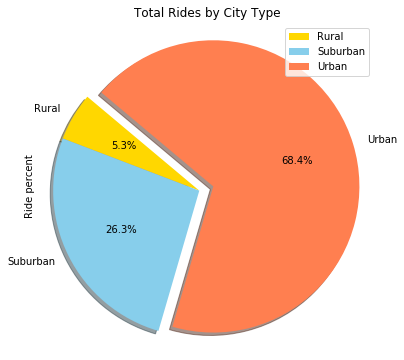

In [8]:
labels=["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","skyblue","coral"]
plot = TotalRides_df.plot(kind='Pie',y='Ride percent', figsize=(6, 6),explode=explode,labels=labels,
                          autopct="%1.1f%%",colors=colors,shadow=True,startangle=140,title="Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalRidesByCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [9]:
# Calculate Driver Percents

TotalDriversbytype=grpByType["Total Drivers"].sum()

TotalDrivers=round(TotalDriversbytype.sum(axis=0),2)

Type_percents=round(TotalDriversbytype/TotalDrivers*100,1)

TotalDrivers_df=pd.DataFrame({"Total Drivers":TotalDriversbytype,
                            "Driver percent":Type_percents })

TotalDrivers_df=TotalDrivers_df.reset_index()

TotalDrivers_df


,type,Total Drivers,Driver percent
0,Rural,78,2.6
1,Suburban,490,16.5
2,Urban,2405,80.9


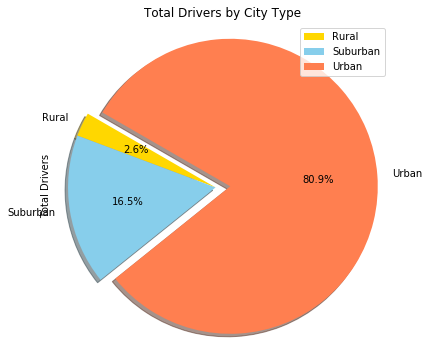

In [10]:
labels=["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","skyblue","coral"]
plot = TotalDrivers_df.plot(kind='Pie',y='Total Drivers', figsize=(6, 6),explode=explode,labels=labels,
                          autopct="%1.1f%%",colors=colors,shadow=True,startangle=150,title="Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalDriversByCityType.png")

# Show Figure
plt.show()